# 課題7 主成分分析

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 共分散行列

2つの変数x, yがとる対応するn個の値を
x = x1, x2, x3, .....xn
y = y1, y2, y3, ....yn
とすると、これらの変数間の共分散は以下のように計算できる。共分散は変数間の関係性を表すのに用いられ、共分散を正規化したものは相関係数となる。  
$\Sigma_{i=1}^{n} (xi-\bar{x})(yi-\bar{y})/n$  
不偏分散とする場合はn-1で割るが、本課題では標準分散を考え、nで割る。  
複数の変数について、変数間の分散と共分散の一覧を行列の形でまとめたものを分散共分散行列という。  
  
行列（2次元配列）を引数として受け取り、各列を変数として列間の共分散行列を返す関数cov_matrixを完成させよ。

In [2]:
def cov_matrix(X):
    ### 引数：
    # X: 行列（2次元配列）
    
    cov_mat = np.cov(X, rowvar=0, bias=1)

    return cov_mat

In [3]:
from sklearn.datasets import load_iris
iris = load_iris() 
X_iris=iris['data']
print(cov_matrix(X_iris))

[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


## Q2 主成分分析

以下では、主成分分析により特徴量の次元縮約を行うpca関数を実装する。pca関数では第一引数に入力のデータ行列(データ数m × 次元数n)、第二引数に次元数kを受け取り、入力データを第二引数で指定された次元数に縮約した行列(データ数m × 次元数k)とその時の累積寄与率を返します。  
具体的に、pca関数では以下の手順により入力データの次元縮約を行います。  

-各次元(特徴量)の標準化  
入力データの各次元(特徴量)を平均0、分散1に標準化する。  
  
-特徴量間の共分散行列の作成
標準化した特徴量間の共分散行列を作成する。  
  
-共分散行列の固有値・固有ベクトルの計算  
固有値・固有ベクトルの計算にはNumpyのnp.linalg.eig関数を用いる。np.linalg.eig関数の引数に以下のように行列を与えると、その行列の固有値を要素とする配列wとそれらの固有値に対応する固有ベクトルを列に持つvを返す。  
w, v = np.linalg.eig(行列)  
  
- 元のデータを$k$個の固有ベクトル（主成分）を基底とする座標で表す

    - 上記で計算した固有値・固有ベクトルについて、固有ベクトルをそれが対応する固有値の大きい順に$k$個選び、それらをデータの新たな基底とする。

        - 例えば、$n=4, k=2$ とし、4次元のデータを2次元に縮約するときは、固有値の大きい順に固有ベクトル$v_1, v_2$（それぞれ$1\times n$のベクトル）を２つ選び、元のデータ$x^{(i)}$（$n\times 1$のベクトル）との内積を計算することで、元のデータに対して$v_1, v_2$を新たな基底とする縮約された次元の座標$x^{(i)}_{new}$を計算できる。

        - $x^{(i)}_{new}=(x^{(i)}v_1, x^{(i)}v_2)$（$v_1, v_2$を基底とする座標）

    - 上記で標準化した元の入力データ行列を$X$（$x^{(1)},x^{(2)},...,x^{(m)}$を行ベクトルとする行列）とし、$k$個の固有ベクトル$v_1,v_2,...,v_k$を列ベクトルとする行列$(v_1 v_2 ... v_k)$を考えると、`pca`関数が返す$k$次元に縮約されたデータは$v_1,v_2,...,v_k$を基底した座標点として以下のように表せる。

    - $
    \left(
    \begin{array}{c}
      x^{(1)}_{new}  \\
       x^{(2)}_{new}  \\
        ...  \\
         x^{(m)}_{new}  \\
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      x^{(1)}  \\
       x^{(2)}  \\
        ...  \\
         x^{(m)}  \\
    \end{array}
  \right)
    \left(
    \begin{array}{cccc}
      v_1 & v_2 & ... & v_k 
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      x^{(1)} v_1,  x^{(1)} v_2, ..., x^{(1)} v_k \\
       x^{(2)} v_1,  x^{(2)} v_2, ..., x^{(2)} v_k \\
    ...  \\
     x^{(m)} v_1,  x^{(m)} v_2, ..., x^{(m)} v_k \\ 
    \end{array}
  \right)
$

- 累積寄与率の計算
    - $k$個の固有ベクトル（主成分）までの固有値$\lambda_i(i=1,..,k)$（分散）の和が全部の固有値（分散）$\lambda_i(i=1,..,n)$の総和に占める以下の割合を累積寄与率と呼ぶ。`pca`関数は$k$次元に縮約されたデータとともにこの累積寄与率を返す

    - $\Sigma_{i=1}^k\lambda_i/\Sigma_{i=1}^n\lambda_i$

上記に従って、`pca`関数を完成させよ。

In [50]:
def pca(X, k):
    ### 引数：
    # mat: 入力のデータ行列(データ数m*次元数n)
    # k: 次元数
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.sqrt(np.var(X[:,i]))

    cov = cov_matrix(X)
    
    w, v = np.linalg.eig(cov)
    ind = np.argsort(w)[::-1]
    eig_val = w[ind[:k]]
    eig_vec = v[:, ind[:k]]
    
    X = np.dot(X, eig_vec)
    rate = np.sum(eig_val[:k])/np.sum(w)
    
    return X, rate

0.7277045209380134


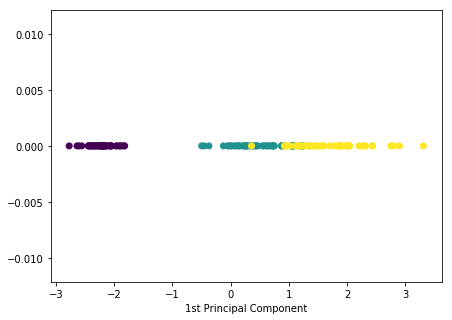

In [51]:
from sklearn.datasets import load_iris

iris = load_iris() 
X_iris=iris['data']
D, P=pca(X_iris, 1) # 1次元に縮約
print(P) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.scatter(D[:,0], np.zeros(D.shape[0]),c=iris.target);

0.9580097536148199


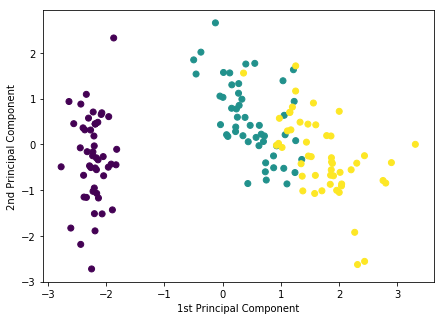

In [52]:
from sklearn.datasets import load_iris

iris = load_iris() 
X_iris=iris['data']
D, P=pca(X_iris, 2) # 2次元に縮約
print(P) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1],c=iris.target);

0.9948480731910937


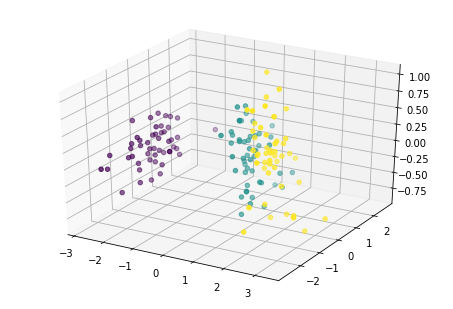

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris() 
X_iris=iris['data']
D, P=pca(X_iris, 3) # 3次元に縮約
print(P) # 累積寄与率

ax = Axes3D(plt.figure())
ax.scatter(D[:,0], D[:,1], D[:,2],c=iris.target);

## scikit-learnで主成分分析

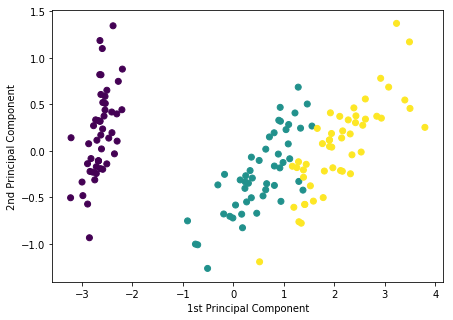

In [54]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris() 
X_iris=iris['data']

# 以下では入力の標準化はしていない
model = PCA(n_components=2) 
model.fit(X_iris) 
D=model.transform(X_iris) 

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1],c=iris.target);